In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import jieba
from sklearn.feature_extraction.text import CountVectorizer

讀取的檔案，已經涵蓋了新聞的正負面屬性，今天我們希望找出每篇新聞的關鍵字  
因此除了要做結巴切詞之外，同時也希望得到tf-idf等等資訊  
不過再這之前，我們希望對新聞資訊做一些處理(處理亂碼、標點符號、停用詞等等)  
更進階一點，為了讓結巴切的準確一些，我們可以新增字典，讓結巴沒看過的詞彙也分的出來   

In [2]:
LARGAN_PRICE = pd.read_csv('/Users/liaoshousan/Desktop/大四上/R語言與資料科學導論/Final_PROJECT-StockPrice Prediction/已經標記的股價/LARGAN_Stock.csv')
Foxconn_PRICE = pd.read_csv('/Users/liaoshousan/Desktop/大四上/R語言與資料科學導論/Final_PROJECT-StockPrice Prediction/已經標記的股價/Foxconn_Stock.csv')
TSMC_PRICE = pd.read_csv('/Users/liaoshousan/Desktop/大四上/R語言與資料科學導論/Final_PROJECT-StockPrice Prediction/已經標記的股價/TSMC_Stock.csv')


LARGAN_NEWS = pd.read_csv('/Users/liaoshousan/Desktop/大四上/R語言與資料科學導論/Final_PROJECT-StockPrice Prediction/已經標記的新聞/LARGAN_NEWS.csv')
Foxconn_NEWS = pd.read_csv('/Users/liaoshousan/Desktop/大四上/R語言與資料科學導論/Final_PROJECT-StockPrice Prediction/已經標記的新聞/Foxconn_NEWS.csv')
TSMC_NEWS = pd.read_csv('/Users/liaoshousan/Desktop/大四上/R語言與資料科學導論/Final_PROJECT-StockPrice Prediction/已經標記的新聞/TSMC_NEWS.csv')



In [3]:
TSMC_NEWS

,TITLE,TIME,DESCRIPTION,CONTENT,year,month,day,hour,status
0,台積電ADR飆新高 台股聚焦科技股,2019-12-12,美國聯準會（Fed）維持利率不變，且暗示2020年不會升息，費半大漲，台積電ADR大漲2.5...,台積電。路透 分享 facebook \n美國聯準會（Fed）維持利率不變，且...,2019,12,12,0,0
1,台股驚驚漲誰是顧大盤？ 顧立雄這麼說,2019-12-12,立委羅明才今（12）日上午在立法院財委會表示，台股大盤出現一個令人驚奇的發展，現在加權指數漲...,金管會主委顧立雄。本報資料照片 分享 facebook \n立委羅明才今（12...,2019,12,12,0,0
2,"台積電飆328元歷史天價 台股大漲百點站上11,800點",2019-12-12,"台股今（12）日跳空，再創29年半新高，台股開盤上漲66.18點，開在11,766.98點，...",台股示意圖。 本報資料照片 分享 facebook \n台股今（12）日跳空，...,2019,12,12,0,0
3,黃崇仁連任TwIoTA理事長 將擴大AI、5G、IoT跨產業交流,2019-12-11,台灣物聯網產業技術協會（TwIoTA）今天舉辦第二屆第一次會員大會，並改選理監事，由力晶集團...,台灣物聯網產業技術協會（TwIoTA）今天舉辦第二屆第一次會員大會，並改選理監事，由力晶集團...,2019,12,11,0,0
4,外資：半導體股漲到下季,2019-12-12,"台積電昨（11）日領軍半導體股，率台股強攻11,700點大關。外資野村、?豐發布最新分析報告...","台積電昨（11）日領軍半導體股，率台股強攻11,700點大關。外資野村、?豐發布最新分析報告...",2019,12,12,0,0
...,...,...,...,...,...,...,...,...,...
6643,李家同談金大事件：學生對學校有驕傲感 就不會發生,2017-06-21,清華大學榮譽教授李家同6月初應邀出席金大畢業典禮，因致詞時台下學生進進出出，李直接在台上批評...,李家同日前受邀金門大學畢典。報系資料照 分享 facebook 清華大學榮譽教授...,2017,6,21,0,0
6644,交大力推會呼吸的房子 新竹市長林智堅大為讚賞,2017-06-26,新竹市長林智堅今天參加交通大學跨領域設計科學中心舉辦「瓶中的小太陽─永續能源工作坊」活動，對...,新竹市長林智堅今天參加交通大學跨領域設計科學中心舉辦「瓶中的小太陽─永續能源工作坊」活動，對...,2017,6,26,0,0
6645,好美！屏東「柚園辦工作坊」手作復育螢火蟲棲地,2017-03-04,屏東麟洛鄉的柚園生態農場17日、18日將舉辦「手作螢火蟲棲地復育工作坊」，教大家如何復育螢火蟲,屏東麟洛鄉的柚園生態農場17日、18日將舉辦「手作螢火蟲棲地復育工作坊」，教大家如何復育螢火...,2017,3,4,0,0
6646,王茂臻／大老闆的生死課,2017-04-16,今年初，台泥前董事長辜成允因跌倒驟逝，震撼企業界，台積電董事長張忠謀撰文悼念辜成允時說：「冥...,美聯社、聯合報系資料照 分享 facebook 今年初，台泥前董事長辜成允因跌倒...,2017,4,16,0,0


### 正則表達式把文章弄得好看一點

In [4]:
add_word_list = pd.read_table("/Users/liaoshousan/Desktop/大四上/R語言與資料科學導論/Final_PROJECT-StockPrice Prediction/Jieba自定義字典/TSMC_Dict.txt",header=None)
add_word_list.columns = ['vocab']
add_word_list = list(add_word_list['vocab'])
for i in add_word_list:
    jieba.add_word(i)
    

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/fw/yrm4dfxx35d5v8qp2gntf8100000gn/T/jieba.cache
Loading model cost 1.296 seconds.
Prefix dict has been built succesfully.


## 找出正面新聞的重要詞彙

In [5]:
upnews = TSMC_NEWS[TSMC_NEWS['status']==1]
allnews = TSMC_NEWS['CONTENT']
downnews = TSMC_NEWS[TSMC_NEWS['status']==-1]
   
positive_token = []
for goodnews in upnews['CONTENT']:
    goodnews = re.sub(r'[。，（）_?\d]','',goodnews)
    #這邊想再加一行過濾亂碼的條件，但是還沒搞懂
    seg_list = jieba.cut(goodnews)
    token = ' '.join(seg_list)
    positive_token.append(token)

count_vec_pos = CountVectorizer()
good_news_count = count_vec_pos.fit_transform(positive_token)
good_news_corpus = count_vec_pos.get_feature_names() 
good_news_count = pd.DataFrame(good_news_count.toarray(),columns = good_news_corpus)

#-----------------------------

all_token = []
for all_news in allnews:
    all_news = re.sub(r'[。，（）_?\d]','',all_news)
    seg_list = jieba.cut(all_news)
    token = ' '.join(seg_list)
    all_token.append(token)
   
count_vec_all_pos_vocab = CountVectorizer(vocabulary=good_news_corpus)
all_news_count_pos = count_vec_all_pos_vocab.fit_transform(all_token)
all_news_count_pos = pd.DataFrame(all_news_count_pos.toarray(),columns = good_news_corpus)
    
#-----------------------------

negative_token = []
for badnews in downnews['CONTENT']:
    badnews = re.sub(r'[。，（）_?\d]','',badnews)
    seg_list = jieba.cut(badnews)
    token = ' '.join(seg_list)
    negative_token.append(token)

count_vec_neg = CountVectorizer()
bad_news_count = count_vec_neg.fit_transform(negative_token)
bad_news_corpus = count_vec_neg.get_feature_names() 
bad_news_count = pd.DataFrame(bad_news_count.toarray(),columns = bad_news_corpus)

#-----------------------------
   
count_vec_all_neg_vocab = CountVectorizer(vocabulary=bad_news_corpus)
all_news_count_neg = count_vec_all_neg_vocab.fit_transform(all_token)
all_news_count_neg = pd.DataFrame(all_news_count_neg.toarray(),columns = bad_news_corpus)





### 待解決問題：
1.結巴不支援英文，是否用NLTK拉出來處理  
2.stopwords還沒時間搞  
3.組員切出來的自定義辭典不能用(貌似要加詞頻那些)  

In [7]:
all_news_count_neg

,aai,aalp,aambiq,aamd,aapollo,aapple,aarm,aaron,aasm,accl,...,點跌,點道瓊,點開盤,點閱,點關,齊挫,齊漲,齊發,齊跌,龍頭
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6643,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6644,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6645,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6646,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 計算全部新聞和正面新聞的tf-idf / Chi-Square值

### Good news

In [8]:
allnews_tf_dictionary_pos = {}
allnews_df_dictionary_pos = {}


column_name = all_news_count_pos.columns

for i in column_name:
    allnews_tf_dictionary_pos[i] = all_news_count_pos.loc[:,i].sum()
    allnews_df_dictionary_pos[i] = np.count_nonzero(all_news_count_pos.loc[:,i])

all_news_pos_tf = pd.DataFrame.from_dict(allnews_tf_dictionary_pos,orient='index',columns = ['tf_all_news'])
all_news_pos_df = pd.DataFrame.from_dict(allnews_df_dictionary_pos,orient='index',columns = ['df_all_news'])
all_news_pos = pd.concat([all_news_pos_tf,all_news_pos_df],axis = 1)
all_news_pos['tf-idf_all_news'] =(np.log(all_news_count_pos.shape[0])/all_news_pos['df_all_news'])* all_news_pos['tf_all_news']


pos_tf_dictionary = {}
pos_df_dictionary = {}

column_name = good_news_count.columns

for i in column_name:
    pos_tf_dictionary[i] = good_news_count.loc[:,i].sum()
    pos_df_dictionary[i] = np.count_nonzero(good_news_count.loc[:,i])

good_news_tf = pd.DataFrame.from_dict(pos_tf_dictionary,orient='index',columns = ['tf_good_news'])
good_news_df = pd.DataFrame.from_dict(pos_df_dictionary,orient='index',columns = ['df_good_news'])
good_news = pd.concat([good_news_tf,good_news_df],axis = 1)
good_news['tf-idf_good_news'] = (np.log(good_news_count.shape[0])/good_news['df_good_news'])* good_news['tf_good_news']



### Bad news

In [9]:
allnews_tf_dictionary_neg = {}
allnews_df_dictionary_neg = {}


column_name = all_news_count_neg.columns

for i in column_name:
    allnews_tf_dictionary_neg[i] = all_news_count_neg.loc[:,i].sum()
    allnews_df_dictionary_neg[i] = np.count_nonzero(all_news_count_neg.loc[:,i])

all_news_tf = pd.DataFrame.from_dict(allnews_tf_dictionary_neg,orient='index',columns = ['tf_all_news'])
all_news_df = pd.DataFrame.from_dict(allnews_df_dictionary_neg,orient='index',columns = ['df_all_news'])
all_news_neg = pd.concat([all_news_tf,all_news_df],axis = 1)
all_news_neg['tf-idf_all_news'] =(np.log(all_news_count_neg.shape[0])/all_news_neg['df_all_news'])* all_news_neg['tf_all_news']


neg_tf_dictionary = {}
neg_df_dictionary = {}

column_name = bad_news_count.columns

for i in column_name:
    neg_tf_dictionary[i] = bad_news_count.loc[:,i].sum()
    neg_df_dictionary[i] = np.count_nonzero(bad_news_count.loc[:,i])

#把字典弄成dataframe
bad_news_tf = pd.DataFrame.from_dict(neg_tf_dictionary,orient='index',columns = ['tf_bad_news'])
bad_news_df = pd.DataFrame.from_dict(neg_df_dictionary,orient='index',columns = ['df_bad_news'])
bad_news = pd.concat([bad_news_tf,bad_news_df],axis = 1)
bad_news['tf-idf_bad_news'] = (np.log(bad_news_count.shape[0])/bad_news['df_bad_news'])* bad_news['tf_bad_news']



In [10]:
TSMCtext_pos = pd.concat([good_news,all_news_pos],axis = 1,ignore_index=True)
TSMCtext_pos.columns = list(good_news.columns)+list(all_news_pos)
TSMCtext_pos['總新聞數'] = all_news_count_pos.shape[0]
TSMCtext_pos['好新聞數'] = good_news_count.shape[0]
TSMCtext_pos['tf期望值'] = TSMCtext_pos['tf_all_news']/all_news＿count_pos.shape[0]
TSMCtext_pos['df期望值'] = TSMCtext_pos['df_all_news']/all_news＿count_pos.shape[0]
TSMCtext_pos['MI'] = TSMCtext_pos['df_good_news'] / (TSMCtext_pos['總新聞數']*TSMCtext_pos['df_all_news'])
TSMCtext_pos['MI*tf-idf'] = TSMCtext_pos['MI']*TSMCtext_pos['tf-idf_good_news']
TSMCtext_pos['tf卡方值'] = np.square(TSMCtext_pos['tf_good_news']-TSMCtext_pos['tf期望值'])/TSMCtext_pos['tf期望值']
TSMCtext_pos['df卡方值'] = np.square(TSMCtext_pos['df_good_news']-TSMCtext_pos['df期望值'])/TSMCtext_pos['df期望值']
TSMCtext_pos['df卡方*tf-idf'] = TSMCtext_pos['df卡方值']*TSMCtext_pos['tf-idf_good_news']
TSMCtext_pos['lift'] = (TSMCtext_pos['df_good_news']/TSMCtext_pos['好新聞數'])/(TSMCtext_pos['df_all_news']/TSMCtext_pos['總新聞數'])





In [11]:
TSMCtext_neg = pd.concat([bad_news,all_news_neg],axis = 1,ignore_index=True)
TSMCtext_neg.columns = list(bad_news.columns)+list(all_news_neg)
TSMCtext_neg['總新聞數'] = all_news_count_neg.shape[0]
TSMCtext_neg['壞新聞數'] = bad_news_count.shape[0]
TSMCtext_neg['tf期望值'] = TSMCtext_neg['tf_all_news']/all_news＿count_neg.shape[0]
TSMCtext_neg['df期望值'] = TSMCtext_neg['df_all_news']/all_news＿count_neg.shape[0]
TSMCtext_neg['MI'] = TSMCtext_neg['df_bad_news'] / (TSMCtext_neg['總新聞數']*TSMCtext_neg['df_all_news'])
TSMCtext_neg['MI*tf-idf'] = TSMCtext_neg['MI']*TSMCtext_neg['tf-idf_bad_news']
TSMCtext_neg['tf卡方值'] = np.square(TSMCtext_neg['tf_bad_news']-TSMCtext_neg['tf期望值'])/TSMCtext_neg['tf期望值']
TSMCtext_neg['df卡方值'] = np.square(TSMCtext_neg['df_bad_news']-TSMCtext_neg['df期望值'])/TSMCtext_neg['df期望值']
TSMCtext_neg['df卡方*tf-idf'] = TSMCtext_neg['df卡方值']*TSMCtext_neg['tf-idf_bad_news']
TSMCtext_neg['lift'] = (TSMCtext_neg['df_bad_news']/TSMCtext_neg['壞新聞數'])/(TSMCtext_neg['df_all_news']/TSMCtext_neg['總新聞數'])




In [12]:
TSMCtext_pos['mix'] = TSMCtext_pos['MI']*TSMCtext_pos['df卡方*tf-idf']
TSMCtext_neg['mix'] = TSMCtext_neg['MI']*TSMCtext_neg['df卡方*tf-idf']

### 基本訊息都處理好了，接下來就是挑選關鍵字，並且以這些關鍵字為每一篇文章貼上正面分數和負面分數

In [13]:
TSMCtext_pos.sort_values(by = 'mix',ascending=False).head(20)
TSMCtext_neg.sort_values(by = 'mix',ascending=False).head(20)


,tf_bad_news,df_bad_news,tf-idf_bad_news,tf_all_news,df_all_news,tf-idf_all_news,總新聞數,壞新聞數,tf期望值,df期望值,MI,MI*tf-idf,tf卡方值,df卡方值,df卡方*tf-idf,lift,mix
rec,15,1,83.582310,15,1,132.031070,6648,263,0.002256,0.000150,0.00015,0.012573,99690.002256,6646.000150,555488.048040,25.277567,83.557167
tvbs,6,1,33.432924,6,1,52.812428,6648,263,0.000903,0.000150,0.00015,0.005029,39876.000903,6646.000150,222195.219216,25.277567,33.422867
gooogle,5,1,27.860770,5,1,44.010357,6648,263,0.000752,0.000150,0.00015,0.004191,33230.000752,6646.000150,185162.682680,25.277567,27.852389
郭偉政,4,2,11.144308,4,2,17.604143,6648,263,0.000602,0.000301,0.00015,0.001676,26584.000602,13292.000301,148130.146144,25.277567,22.281911
李錦記,4,1,22.288616,4,1,35.208285,6648,263,0.000602,0.000150,0.00015,0.003353,26584.000602,6646.000150,148130.146144,25.277567,22.281911
柏亨,4,4,5.572154,4,4,8.802071,6648,263,0.000602,0.000602,0.00015,0.000838,26584.000602,26584.000602,148130.146144,25.277567,22.281911
razer,4,1,22.288616,4,1,35.208285,6648,263,0.000602,0.000150,0.00015,0.003353,26584.000602,6646.000150,148130.146144,25.277567,22.281911
借錢,4,1,22.288616,4,1,35.208285,6648,263,0.000602,0.000150,0.00015,0.003353,26584.000602,6646.000150,148130.146144,25.277567,22.281911
平將,3,2,8.358231,3,2,13.203107,6648,263,0.000451,0.000301,0.00015,0.001257,19938.000451,13292.000301,111097.609608,25.277567,16.711433
rcep,3,2,8.358231,3,2,13.203107,6648,263,0.000451,0.000301,0.00015,0.001257,19938.000451,13292.000301,111097.609608,25.277567,16.711433


In [14]:
final_positive_token = np.array(TSMCtext_pos.sort_values(by = 'mix',ascending=False).head(1000).index)
final_negative_token = np.array(TSMCtext_neg.sort_values(by = 'mix',ascending=False).head(1000).index)

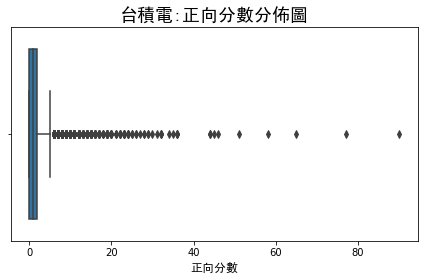

In [15]:
import seaborn as sns
from matplotlib.font_manager import FontProperties
font = FontProperties(fname='/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf')
fig = plt.figure(figsize=(6, 4),tight_layout=True)
all_news_pos_score = all_news_count_pos[final_positive_token].sum(axis = 1)
all_news_neg_score = all_news_count_neg[final_negative_token].sum(axis = 1)

sns.boxplot(all_news_pos_score)
all_news_pos_score.describe()
plt.title('台積電:正向分數分佈圖',fontproperties=font,fontsize=18)
plt.xlabel('正向分數',fontproperties=font,fontsize=12)

plt.savefig('台積電:正向分數分佈圖.png',tight_layout=True)



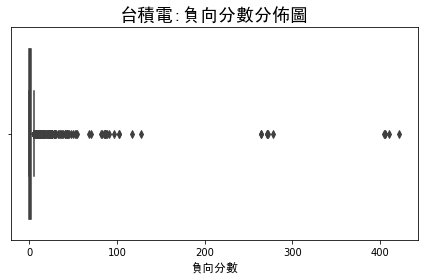

In [16]:
import seaborn as sns
from matplotlib.font_manager import FontProperties
font = FontProperties(fname='/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf')
fig = plt.figure(figsize=(6, 4),tight_layout=True)
all_news_pos_score = all_news_count_pos[final_positive_token].sum(axis = 1)
all_news_neg_score = all_news_count_neg[final_negative_token].sum(axis = 1)

sns.boxplot(all_news_neg_score)
all_news_neg_score.describe()
plt.title('台積電:負向分數分佈圖',fontproperties=font,fontsize=18)
plt.xlabel('負向分數',fontproperties=font,fontsize=12)

plt.savefig('台積電:負向分數分佈圖.png',tight_layout=True)




### 發現df卡方 x tf-idf 會表現最好

因此輸出重要的正負向情緒字各1000個

In [17]:
fp = open("/Users/liaoshousan/Desktop/大四上/R語言與資料科學導論/Final_PROJECT-StockPrice Prediction/兩千個重要正負面詞彙/台積電_token_2000.txt", "w")
 
# 寫入 all_tokens 到檔案
for token in final_positive_token:
    fp.writelines(token)
    fp.writelines('\n')
# 關閉檔案
fp.close()

fp = open("/Users/liaoshousan/Desktop/大四上/R語言與資料科學導論/Final_PROJECT-StockPrice Prediction/兩千個重要正負面詞彙/台積電_token_2000.txt", "a")

for token in final_negative_token:
    fp.writelines(token)
    fp.writelines('\n')

fp.close()

### 在還沒有斷詞斷乾淨前，就姑且以「df卡方 x tf-idf」這個標準挑選前500個詞來給每篇文章正面和負面分數

In [18]:
positive_score = all_news_count_pos[final_positive_token].sum(axis = 1)
negative_score  = all_news_count_neg[final_negative_token].sum(axis = 1)
TSMC_NEWS['positive_score'] = positive_score
TSMC_NEWS['negative_score'] = negative_score
TSMC_NEWS['emotional_score'] = TSMC_NEWS['positive_score'] - TSMC_NEWS['negative_score']

In [19]:
TSMC_NEWS[TSMC_NEWS['status']==1]['emotional_score'].describe()

count    264.000000
mean       5.712121
std       12.028186
min      -58.000000
25%        0.000000
50%        1.000000
75%        8.000000
max       88.000000
Name: emotional_score, dtype: float64

In [20]:
TSMC_NEWS[TSMC_NEWS['status']==0]['emotional_score'].describe()

count    6121.000000
mean       -0.745793
std        14.265528
min      -421.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        47.000000
Name: emotional_score, dtype: float64

In [21]:
TSMC_NEWS[TSMC_NEWS['status']==-1]['emotional_score'].describe()

count    263.000000
mean      -9.528517
std       28.441284
min     -278.000000
25%       -6.000000
50%       -1.000000
75%        0.000000
max        1.000000
Name: emotional_score, dtype: float64

有了每天文章的分數，再來就是要和股價呼應了，每日股價都應該會有一排該日所有文章的「情緒分數」

In [22]:
TSMC_PRICE.rename(columns={'日期':'TIME'}, inplace=True)

In [23]:
TSMC_PRICE

,TIME,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數,status
0,2018-03-01,43847984.0,1.066919e+10,244.0,245.0,242.0,243.0,-3.0,"11,589",0
1,2018-03-02,35289170.0,8.453712e+09,240.0,241.0,238.5,240.0,-3.0,"10,440",0
2,2018-03-05,27337846.0,6.607368e+09,242.5,243.0,240.5,241.5,1.5,"9,321",0
3,2018-03-06,36945780.0,9.155812e+09,245.5,250.0,245.5,250.0,8.5,"13,977",1
4,2018-03-07,30391219.0,7.525602e+09,248.0,248.5,246.0,247.0,-3.0,"10,521",0
...,...,...,...,...,...,...,...,...,...,...
511,2019-10-25,25082711.0,7.362075e+09,294.5,294.5,292.5,293.5,0.5,"11,064",0
512,2019-10-28,20216561.0,5.958715e+09,295.0,295.5,294.0,294.5,1.0,"9,257",0
513,2019-10-29,37130131.0,1.104465e+10,297.0,298.5,296.5,298.5,4.0,"14,060",0
514,2019-10-30,32370342.0,9.646552e+09,298.5,299.5,296.5,299.5,1.0,"11,084",0


In [24]:
TSMC_NEWS['TIME'] =  pd.to_datetime(TSMC_NEWS['TIME'], format='%Y/%m/%d')
TSMC_PRICE['TIME'] =  pd.to_datetime(TSMC_PRICE['TIME'], format='%Y/%m/%d')


由於今天的新聞，你只能獲得前n天的股價資訊，而不會得知「當天的」任何市場資訊  
因此我在處理該篇新聞的其他衍生數據時，要concat的是前幾天的股市資訊  

In [25]:
mylist = ['d','v','b']
m = '1'
mylist = list(map(lambda x:x+m,mylist))
mylist

['d1', 'v1', 'b1']

In [26]:
import time
from datetime import datetime, date, time, timedelta
def time_shift(df,n):
    df = df.set_index('TIME')
    df = df.shift(n)
    df = df.reset_index()
    return df
    
TSMC_PRICE_d1 = time_shift(TSMC_PRICE,1)
TSMC_PRICE_d2 = time_shift(TSMC_PRICE,2)
TSMC_PRICE_d3 = time_shift(TSMC_PRICE,3)
# temp1 = pd.merge(TSMC_PRICE_d1,TSMC_PRICE_d2,how = 'inner',on='TIME')
# temp2 = pd.merge(temp1,TSMC_PRICE_d3,how = 'inner',on='TIME')
# TSMC_PRICE = temp2

In [27]:
TSMC_PRICE_d1.drop(columns = ['status','TIME'],inplace = True)
TSMC_PRICE_d2.drop(columns = ['status','TIME'],inplace = True)
TSMC_PRICE_d3.drop(columns = ['status','TIME'],inplace = True)
output = pd.concat([TSMC_PRICE_d1,TSMC_PRICE_d2,TSMC_PRICE_d3],axis = 1)


In [28]:
output.columns = ['成交股數_d1','成交金額_d1','開盤價_d1','最高價_d1','最低價_d1','收盤價_d1','漲跌價差_d1','成交筆數_d1',
                  '成交股數_d2','成交金額_d2','開盤價_d2','最高價_d2','最低價_d2','收盤價_d2','漲跌價差_d2','成交筆數_d2',
                 '成交股數_d3','成交金額_d3','開盤價_d3','最高價_d3','最低價_d3','收盤價_d3','漲跌價差_d3','成交筆數_d3']
# output['成交筆數_d1'] = output['成交筆數_d1'].apply(lambda x: x.replace(',',''))

output['TIME'] = TSMC_PRICE['TIME']
output['status'] = TSMC_PRICE['status']

In [29]:
output.head()

,成交股數_d1,成交金額_d1,開盤價_d1,最高價_d1,最低價_d1,收盤價_d1,漲跌價差_d1,成交筆數_d1,成交股數_d2,成交金額_d2,...,成交股數_d3,成交金額_d3,開盤價_d3,最高價_d3,最低價_d3,收盤價_d3,漲跌價差_d3,成交筆數_d3,TIME,status
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-01,0
1,43847984.0,1.066919e+10,244.0,245.0,242.0,243.0,-3.0,"11,589",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-02,0
2,35289170.0,8.453712e+09,240.0,241.0,238.5,240.0,-3.0,"10,440",43847984.0,1.066919e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-05,0
3,27337846.0,6.607368e+09,242.5,243.0,240.5,241.5,1.5,"9,321",35289170.0,8.453712e+09,...,43847984.0,1.066919e+10,244.0,245.0,242.0,243.0,-3.0,"11,589",2018-03-06,1
4,36945780.0,9.155812e+09,245.5,250.0,245.5,250.0,8.5,"13,977",27337846.0,6.607368e+09,...,35289170.0,8.453712e+09,240.0,241.0,238.5,240.0,-3.0,"10,440",2018-03-07,0


每篇新聞都有emotional score了，但是每天的emotional score集合  
對每天的股市估算出一個average_emotional_score  
但後來也沒用到  

In [30]:
emotional_score ={}
positive_score = {}
negative_score = {}

for i in output['TIME']:
    try:
        emotional_score[i] = TSMC_NEWS.groupby('TIME').get_group(i)['emotional_score'].mean()
        positive_score[i] = TSMC_NEWS.groupby('TIME').get_group(i)['positive_score'].mean()
        negative_score[i] = TSMC_NEWS.groupby('TIME').get_group(i)['negative_score'].mean()
        
    except :
        emotional_score[i] = 0
        positive_score[i] = 0
        negative_score[i] = 0
emotional_score = pd.DataFrame.from_dict(emotional_score,orient='index').reset_index()
emotional_score.columns=['TIME','emotional_score']
emotional_score['emotional_score_d1'] = emotional_score.emotional_score.shift(1) #因為只能給今天看到前n天的資訊，故要shift(n)
emotional_score['emotional_score_d2'] = emotional_score.emotional_score.shift(2) 
emotional_score['emotional_score_d3'] = emotional_score.emotional_score.shift(3) 
emotional_score.drop(columns=['emotional_score'],inplace = True) 

positive_score = pd.DataFrame.from_dict(positive_score,orient='index').reset_index()
positive_score.columns=['TIME','positive_score']
positive_score['positive_score_d1'] = positive_score.positive_score.shift(1)
positive_score['positive_score_d2'] = positive_score.positive_score.shift(2)
positive_score['positive_score_d3'] = positive_score.positive_score.shift(3)
positive_score.drop(columns=['positive_score'],inplace = True) 

negative_score = pd.DataFrame.from_dict(negative_score,orient='index').reset_index()
negative_score.columns=['TIME','negative_score']
negative_score['negative_score_d1'] = negative_score.negative_score.shift(1)
negative_score['negative_score_d2'] = negative_score.negative_score.shift(2)
negative_score['negative_score_d3'] = negative_score.negative_score.shift(3)
negative_score.drop(columns=['negative_score'],inplace = True) 


temp1 = pd.merge(output,emotional_score,how='inner',on=['TIME'])
temp2 = pd.merge(temp1,positive_score,how='inner',on=['TIME'])
temp3 = pd.merge(temp2,negative_score,how='inner',on=['TIME'])
temp3     


,成交股數_d1,成交金額_d1,開盤價_d1,最高價_d1,最低價_d1,收盤價_d1,漲跌價差_d1,成交筆數_d1,成交股數_d2,成交金額_d2,...,status,emotional_score_d1,emotional_score_d2,emotional_score_d3,positive_score_d1,positive_score_d2,positive_score_d3,negative_score_d1,negative_score_d2,negative_score_d3
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,43847984.0,1.066919e+10,244.0,245.0,242.0,243.0,-3.0,"11,589",NaN,NaN,...,0,-1.000000,NaN,NaN,1.000000,NaN,NaN,2.000000,NaN,NaN
2,35289170.0,8.453712e+09,240.0,241.0,238.5,240.0,-3.0,"10,440",43847984.0,1.066919e+10,...,0,0.000000,-1.000000,NaN,0.000000,1.000000,NaN,0.000000,2.000000,NaN
3,27337846.0,6.607368e+09,242.5,243.0,240.5,241.5,1.5,"9,321",35289170.0,8.453712e+09,...,1,0.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000
4,36945780.0,9.155812e+09,245.5,250.0,245.5,250.0,8.5,"13,977",27337846.0,6.607368e+09,...,0,0.000000,0.000000,0.000000,2.666667,0.000000,0.000000,2.666667,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,29040827.0,8.488070e+09,294.5,294.5,291.0,293.0,0.0,"10,649",30382408.0,8.877573e+09,...,0,0.157895,1.500000,-0.181818,1.315789,2.833333,1.363636,1.157895,1.333333,1.545455
512,25082711.0,7.362075e+09,294.5,294.5,292.5,293.5,0.5,"11,064",29040827.0,8.488070e+09,...,0,-1.291667,0.157895,1.500000,1.875000,1.315789,2.833333,3.166667,1.157895,1.333333
513,20216561.0,5.958715e+09,295.0,295.5,294.0,294.5,1.0,"9,257",25082711.0,7.362075e+09,...,0,0.333333,-1.291667,0.157895,1.555556,1.875000,1.315789,1.222222,3.166667,1.157895
514,37130131.0,1.104465e+10,297.0,298.5,296.5,298.5,4.0,"14,060",20216561.0,5.958715e+09,...,0,-0.281250,0.333333,-1.291667,0.875000,1.555556,1.875000,1.156250,1.222222,3.166667


把結果輸出成新的NEWS和新的price

In [31]:
TSMC_NEWS.to_csv('/Users/liaoshousan/Desktop/大四上/R語言與資料科學導論/Final_PROJECT-StockPrice Prediction/做好所有預處理的新聞/TSMC_NEWS.csv',index=None)
temp3.to_csv('/Users/liaoshousan/Desktop/大四上/R語言與資料科學導論/Final_PROJECT-StockPrice Prediction/做好所有預處理的股價/TSMC_Stock.csv',index=None)


剩下的我們到建模型那塊再講吧

### 將斷詞的詞寫入txt

In [32]:
# all_tokens = list(TSMCtext.sort_values(by = 'MI',ascending=False).index)

# # fp = open("/Users/liaoshousan/Desktop/RLSD_PROJECT-StockPrice Prediction/斷出來的詞/tokenize_result_Largan.txt", "a")
 
# # 寫入 all_tokens 到檔案
# for token in all_tokens:
#     fp.writelines(token)
#     fp.writelines('\n')
    
 
# # 關閉檔案
# fp.close()